# Machine Learning Classification Project 

# ------------------------------------------------------------------------------------------------------------

## Hanya Ashraf 46-0347

## Maram Sherif 46-0935

## Lamis Ahmed 46-1829

## Rolan Khalifa 46-7189

# ------------------------------------------------------------------------------------------------------------

# Part 1 - Data Preprocessing

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from scipy import stats
import numpy as np
from sklearn import preprocessing
from datetime import datetime, date
import requests
import string
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow 
import keras
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.naive_bayes import MultinomialNB

In [5]:
file='1986_Accidents_UK.csv'
df_accidents = pd.read_csv(file,low_memory=False)

## Data Exploration


In [6]:
df_accidents.head(2)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,198601AD00001,1986,01AD00001,529950.0,180480.0,NaN,NaN,Metropolitan Police,Serious,1,...,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Raining no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1
1,198601AD00002,1986,01AD00002,530150.0,179800.0,NaN,NaN,Metropolitan Police,Slight,2,...,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Raining no high winds,Wet or damp,None,None,Data missing or out of range,Data missing or out of range,Data missing or out of range,-1


In [7]:
df_accidents=df_accidents.drop(["accident_index"],axis=1)

In [8]:
cols = df_accidents.columns #Checking column names
cols

Index(['accident_year', 'accident_reference', 'location_easting_osgr',
       'location_northing_osgr', 'longitude', 'latitude', 'police_force',
       'accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'date', 'day_of_week', 'time', 'local_authority_district',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_class', 'first_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [9]:
df_accidents.shape #Checking dataset shape

(247878, 35)

In [10]:
df_accidents.info() #Checking non null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247878 entries, 0 to 247877
Data columns (total 35 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_year                                247878 non-null  int64  
 1   accident_reference                           247878 non-null  object 
 2   location_easting_osgr                        247651 non-null  float64
 3   location_northing_osgr                       247651 non-null  float64
 4   longitude                                    0 non-null       float64
 5   latitude                                     0 non-null       float64
 6   police_force                                 247878 non-null  object 
 7   accident_severity                            247878 non-null  object 
 8   number_of_vehicles                           247878 non-null  int64  
 9   number_of_casualties                         247878 non-nul

In [11]:
df_accidents.describe() #Checking dataset statistics

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,local_authority_ons_district,local_authority_highway,speed_limit,lsoa_of_accident_location
count,247878.0,247651.000000,247651.000000,0.0,0.0,247878.000000,247878.000000,247878.0,247878.0,247878.000000,247878.0
mean,1986.0,432377.670391,309222.919269,NaN,NaN,1.715703,1.296965,-1.0,-1.0,38.375503,-1.0
std,0.0,119578.934802,210251.399336,NaN,NaN,0.725523,0.790182,0.0,0.0,13.564102,0.0
min,1986.0,2200.000000,50.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,0.000000,-1.0
25%,1986.0,376600.000000,173590.000000,NaN,NaN,1.000000,1.000000,-1.0,-1.0,30.000000,-1.0
50%,1986.0,444170.000000,225000.000000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,30.000000,-1.0
75%,1986.0,524800.000000,398200.000000,NaN,NaN,2.000000,1.000000,-1.0,-1.0,40.000000,-1.0
max,1986.0,985000.000000,999900.000000,NaN,NaN,51.000000,63.000000,-1.0,-1.0,70.000000,-1.0


In [12]:
n_unique = df_accidents.nunique()  #Checking unique values because if too many unique values,won't help the ML model to learn
n_unique

accident_year                                       1
accident_reference                             247878
location_easting_osgr                           34312
location_northing_osgr                          43209
longitude                                           0
latitude                                            0
police_force                                       51
accident_severity                                   3
number_of_vehicles                                 22
number_of_casualties                               29
date                                              365
day_of_week                                         7
time                                             1427
local_authority_district                          459
local_authority_ons_district                        1
local_authority_highway                             1
first_road_class                                    7
first_road_number                                3438
road_type                   

# ------------------------------------------------------------------------------------------------------------

# Data Cleaning

This part includes cleaning the data + feature selection for the features we believe will be effective in classifying the accident as severe, fatal or slight. Feature selection is based as well on several trials on the 4 models and selecting the ones that lead to the highest accuracy and good model performance.

We will create a copy of the dataset first and name it Cleandf to avoid distortion in the original copy 

In [13]:
Cleandf=df_accidents.copy() 

Before we do any handling, we will remove missing indicators and put null values

In [14]:
Cleandf = Cleandf.replace('Data missing or out of range', np.nan) 

In [15]:
Cleandf.isnull().sum() #number of null values for each variable

accident_year                                       0
accident_reference                                  0
location_easting_osgr                             227
location_northing_osgr                            227
longitude                                      247878
latitude                                       247878
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number                                  27
road_type                   

In [16]:
Cleandf.isnull().mean()*100 #Percentage of missing data

accident_year                                    0.000000
accident_reference                               0.000000
location_easting_osgr                            0.091577
location_northing_osgr                           0.091577
longitude                                      100.000000
latitude                                       100.000000
police_force                                     0.000000
accident_severity                                0.000000
number_of_vehicles                               0.000000
number_of_casualties                             0.000000
date                                             0.000000
day_of_week                                      0.000000
time                                             0.000000
local_authority_district                         0.000000
local_authority_ons_district                     0.000000
local_authority_highway                          0.000000
first_road_class                                 0.000000
first_road_num

In [17]:
Cleandf.duplicated().sum() 

0

There are no duplicate rows in the dataset

# ------------------------------------------------------------------------------------------------------------

## Handling Missing data

First , we will detect and remove columns will all null values


In [18]:
Cleandf.dropna(axis='columns',how='all',inplace=True)
Cleandf.shape  

(247878, 30)

5 columns were removed

Then, we will also remove columns with 1 unique value as it has no importance for prediction when using ML models because of low variance

In [19]:
for col in Cleandf.columns:
    if len(Cleandf[col].unique()) == 1:
        Cleandf.drop(col,inplace=True,axis=1)

In [20]:
Cleandf.shape 

(247878, 26)

4 more columns were removed

We will also remove columns with ALL unique values in the dataset since the variance is 100% and it doesn't add any information to the dataset. In our case it is the accident reference since it is already included in the second part of accident index column after the year 1986--------- where (---------) refers to the accident reference as shown below

In [21]:
df_accidents[['accident_reference']]

,accident_reference
0,01AD00001
1,01AD00002
2,01AD00003
3,01AD00004
4,01AD00005
...,...
247873,982446578
247874,982456579
247875,982457580
247876,982464581


In [22]:
for col in Cleandf.columns:
    if len(Cleandf[col].unique()) == len(Cleandf):
        Cleandf.drop(col,inplace=True,axis=1)

In [23]:
Cleandf.shape 

(247878, 25)

1 column was removed which is the accident reference

For handling missing data, we will consider that our threshold= 5%, if percentage of missing data is <5%, it is considered to be MCAR
So, will apply CCA for numerical/categorial variables or Mean/Median imputation for numerical variables or Frequent Category imputation for numerical/categorial variables


We will imputate missing columns sequentially as they appear in the dataframe

Starting with location_easting_osgr & location_northing_osgr, the missing values are 0.09%<5%, so will apply CCA and assume it is MCAR

In [24]:
Cleandf[Cleandf['location_easting_osgr'].isnull() & Cleandf['location_northing_osgr'].isnull() ]

,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,...,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
47120,NaN,NaN,Cumbria,Slight,2,1,13/02/1986,Thursday,12:02,Barrow-in-Furness,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
47577,NaN,NaN,Cumbria,Slight,2,1,15/12/1986,Monday,16:45,Copeland,...,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine + high winds,Dry,None,None
80989,NaN,NaN,North Yorkshire,Slight,1,1,05/01/1986,Sunday,16:00,Richmondshire,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Snowing no high winds,Frost or ice,None,None
80999,NaN,NaN,North Yorkshire,Serious,1,1,07/01/1986,Tuesday,12:30,Harrogate,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Snowing no high winds,Frost or ice,None,None
81215,NaN,NaN,North Yorkshire,Serious,2,2,08/02/1986,Saturday,17:49,Selby,...,Stop sign,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208596,NaN,NaN,Avon and Somerset,Serious,1,1,19/04/1986,Saturday,08:00,Sedgemoor,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,Roadworks,None
208855,NaN,NaN,Avon and Somerset,Serious,2,1,31/12/1986,Wednesday,13:00,Taunton Deane,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
216182,NaN,NaN,Dorset,Slight,3,1,29/04/1986,Tuesday,16:50,Bournemouth,...,Give way or uncontrolled,Unclassified,first_road_class is C or Unclassified. These r...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None
225338,NaN,NaN,South Wales,Slight,1,1,24/01/1986,Friday,07:55,703,...,NaN,-1,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Snowing + high winds,Snow,None,None


It is observed that the whole coordinate (east and north) is missing for 227 accidents

In [25]:
Cleandf.dropna(axis='index', subset=['location_easting_osgr'],inplace=True)
Cleandf.dropna(axis='index', subset=['location_northing_osgr'],inplace=True)
Cleandf.shape 

(247651, 25)

In [26]:
Cleandf = Cleandf.drop('second_road_number', axis=1)
Cleandf.shape

(247651, 24)

In [27]:
Cleandf = Cleandf.drop('first_road_number', axis=1)

In [28]:
Cleandf = Cleandf.drop('second_road_class', axis=1)
Cleandf = Cleandf.drop('first_road_class', axis=1)

In [29]:
Cleandf.shape

(247651, 21)

Road Type missing values are only 0.35% from its total values so data is MCAR and we will apply CCA

In [30]:
Cleandf.dropna(axis='index', subset=['road_type'],inplace=True)
Cleandf.shape #rows number decreased

(246782, 21)

Junction detail missing values are only 0.001% from its total values so data is MCAR and we will apply CCA

In [31]:
Cleandf.dropna(axis='index', subset=['junction_detail'], inplace=True)
Cleandf.shape #rows number decreased

(246778, 21)

Since there are still null values in junction_control, we will apply CCA since the remaining null values are <5% of total values 
and that are only 68 records

In [32]:
Cleandf.dropna(axis='index', subset=['junction_control'],inplace=True)
Cleandf.shape #rows number decreased

(148413, 21)

Pedestrian_crossing_human_control missing values are only 0.001% from its total values so data is MCAR and we will apply CCA

In [33]:
Cleandf.dropna(axis='index', subset=['pedestrian_crossing_human_control'], inplace=True)
Cleandf.shape #rows number decreased

(148411, 21)

Pedestrian_crossing_physical_facilities missing values are only 0.001% from its total values so data is MCAR and we will apply CCA

In [34]:
Cleandf.dropna(axis='index', subset=['pedestrian_crossing_physical_facilities'], inplace=True)
Cleandf.shape #rows number decreased


(148411, 21)

light_conditions missing values are only 0.01% from its total values so data is MCAR and we will apply CCA

In [35]:
Cleandf.dropna(axis='index', subset=['light_conditions'], inplace=True)
Cleandf.shape #rows number decreased

(148397, 21)

weather_conditions missing values are only 0.89% from its total values so data is MCAR and we will apply CCA

In [36]:
Cleandf.dropna(axis='index', subset=['weather_conditions'], inplace=True)
Cleandf.shape #rows number decreased

(147121, 21)

road_surface_conditions missing values are only 0.02% from its total values so data is MCAR and we will apply CCA

In [37]:
Cleandf.dropna(axis='index', subset=['road_surface_conditions'], inplace=True)
Cleandf.shape #rows number decreased

(147113, 21)

special_conditions_at_site missing values are only 0.0008% from its total values so data is MCAR and we will apply CCA

In [38]:
Cleandf.dropna(axis='index', subset=['special_conditions_at_site'], inplace=True)
Cleandf.shape #rows number decreased

(147111, 21)

carriageway_hazards missing values are only 0.01% from its total values so data is MCAR and we will apply CCA

In [39]:
Cleandf.dropna(axis='index', subset=['carriageway_hazards'], inplace=True)
Cleandf.shape #rows number decreased


(147093, 21)

After we are done with cleaning, checking if there are still null values

In [40]:
Cleandf.isnull().sum() 

location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
road_surface_conditions                    0
special_conditions_at_site                 0
carriageway_hazards                        0
dtype: int64

No more null values

We believe that some columns will not be beneficial or won't help the model in learning, so will remove them, as more features can increase the risk of overfitting and will make the model more complex.

In [41]:
Cleandf=Cleandf.drop(["police_force","local_authority_district","location_easting_osgr","location_northing_osgr","date"],axis=1)

# ------------------------------------------------------------------------------------------------------------

## Observing outliers

We will observe outliers for numerical variables

In [42]:
CleandfOutliers=Cleandf.copy()

In [43]:
numericFrame = CleandfOutliers.select_dtypes('number')

In [44]:
numericFrame.columns

Index(['number_of_vehicles', 'number_of_casualties', 'speed_limit'], dtype='object')

We will start by getting number of vehicles outliers, will check the skewness first

In [45]:
CleandfOutliers.number_of_vehicles.skew()

0.8364564849665315

In [46]:
class_counts = CleandfOutliers['number_of_vehicles'].value_counts()
class_counts

2     89628
1     46678
3      9072
4      1359
5       259
6        73
7        19
8         3
10        1
9         1
Name: number_of_vehicles, dtype: int64

The skewness is not in range -1 to 1 so it is skewed and indicates the presence of outliers

We will then get the distribution and box plot of number of vehicles

<AxesSubplot:xlabel='number_of_vehicles', ylabel='Density'>

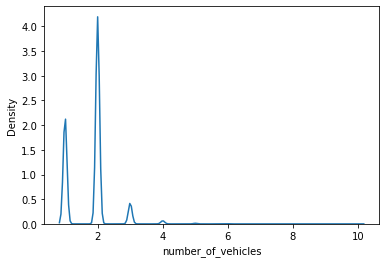

In [47]:
sns.kdeplot(CleandfOutliers['number_of_vehicles'])

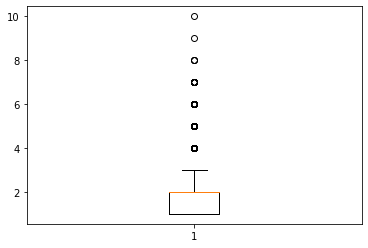

In [48]:
plt.boxplot(CleandfOutliers.number_of_vehicles)
plt.show()

The plots indicate a lot of outliers

We will then check the number of outliers using IQR method

In [49]:
VehiclesQ1 = CleandfOutliers.number_of_vehicles.quantile(0.25)
VehiclesQ3 = CleandfOutliers.number_of_vehicles.quantile(0.75)
VehiclesIQR = VehiclesQ3 - VehiclesQ1
print(VehiclesIQR)

1.0


In [50]:
Vehiclescut_off = VehiclesIQR * 3 #we want to detect only extreme outliers bec. very severe accidents can have ubnormal number of vehicles so we don't want to exclude them
Vehicleslower = VehiclesQ1 - Vehiclescut_off
Vehiclesupper =  VehiclesQ3 + Vehiclescut_off
print(Vehicleslower,Vehiclesupper)

-2.0 5.0


In [51]:
Vehiclesdf1 = CleandfOutliers[CleandfOutliers['number_of_vehicles']> Vehiclesupper]
Vehiclesdf2 = CleandfOutliers[CleandfOutliers['number_of_vehicles'] < Vehicleslower]
print('Total number of number of vehicles outliers are', Vehiclesdf1.shape[0]+ Vehiclesdf2.shape[0])

Total number of number of vehicles outliers are 97


We will then get number of casualties outliers, will check the skewness first

In [52]:
CleandfOutliers.number_of_casualties.skew()

5.782903523166145

In [53]:
class_countsC = CleandfOutliers['number_of_casualties'].value_counts()
class_countsC

1     121166
2      18711
3       4506
4       1698
5        587
6        262
7         94
8         34
9         11
10         8
11         5
14         3
33         2
13         1
19         1
28         1
23         1
12         1
16         1
Name: number_of_casualties, dtype: int64

The skewness is not in range -1 to 1 so it is skewed and indicates the presence of outliers

We will then get the distribution and box plot of number of casualties

<AxesSubplot:xlabel='number_of_casualties', ylabel='Density'>

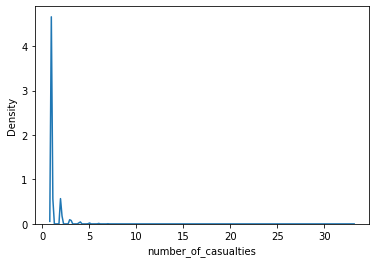

In [54]:
sns.kdeplot(CleandfOutliers['number_of_casualties'])

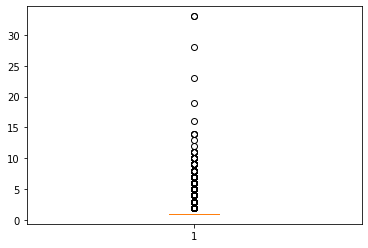

In [55]:
plt.boxplot(CleandfOutliers.number_of_casualties)
plt.show()

The plots indicate a lot of outliers, will use Z-Score method to detect outliers

True     144383
False      2710
Name: number_of_casualties, dtype: int64

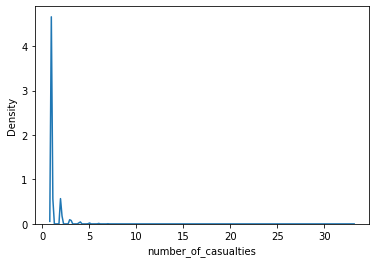

In [56]:
sns.kdeplot(CleandfOutliers["number_of_casualties"])
z = np.abs(stats.zscore(CleandfOutliers['number_of_casualties']))
filtered_entries = z < 3
filtered_entries.value_counts()

We will then get number of speed limit outliers, will check the skewness first

In [57]:
CleandfOutliers.speed_limit.skew()

1.975079395219084

In [58]:
class_countsS = CleandfOutliers['speed_limit'].value_counts()
class_countsS

30.0    114951
60.0     15775
40.0     11554
70.0      3614
50.0      1134
10.0        20
20.0        15
0.0          7
15.0         6
36.0         5
25.0         2
17.0         1
45.0         1
51.0         1
32.0         1
31.0         1
22.0         1
61.0         1
33.0         1
64.0         1
38.0         1
Name: speed_limit, dtype: int64

The skewness is not in range -1 to 1 so it is skewed and indicates the presence of outliers but it's close to the range



We will then get the distribution and box plot of speed limit


<AxesSubplot:xlabel='speed_limit', ylabel='Density'>

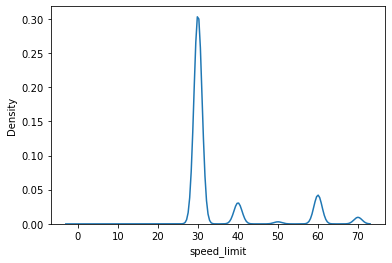

In [59]:
sns.kdeplot(CleandfOutliers['speed_limit'])

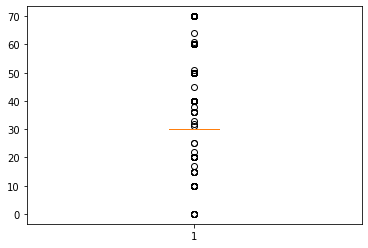

In [60]:
plt.boxplot(CleandfOutliers.speed_limit)
plt.show()

The plots indicate a lot of outliers

We will detect outliers of speed limit by inspection

# ------------------------------------------------------------------------------------------------------------

## Handling outliers

We will remove number of vehicles outliers from the dataset

In [61]:
print(f'Number of entries before removing outliers = {CleandfOutliers.shape[0]}')
CleandfOutliers = CleandfOutliers[(CleandfOutliers['number_of_vehicles'] < Vehiclesupper) & (CleandfOutliers['number_of_vehicles'] > Vehicleslower)]
print(f'Number of entries after removing outliers = {CleandfOutliers.shape[0]}')
CleandfOutliers.number_of_vehicles.value_counts()

Number of entries before removing outliers = 147093
Number of entries after removing outliers = 146737


2    89628
1    46678
3     9072
4     1359
Name: number_of_vehicles, dtype: int64

We will remove number of casualties outliers from the dataset

In [62]:
print(f'Number of entries before removing outliers = {CleandfOutliers.shape[0]}')
CleandfOutliers = CleandfOutliers[filtered_entries]
print(f'Number of entries after removing outliers = {CleandfOutliers.shape[0]}')
CleandfOutliers.number_of_casualties.value_counts()

Number of entries before removing outliers = 146737
Number of entries after removing outliers = 144063


C:\Users\DELL\AppData\Local\Temp\ipykernel_1516\2996822462.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CleandfOutliers = CleandfOutliers[filtered_entries]


1    120977
2     18624
3      4462
Name: number_of_casualties, dtype: int64

Will remove speed limit outliers

In [63]:
values_to_remove = [10.0, 20.0, 15.0,0.0,36.0,25.0,17.0,16.0,45.0,51.0,32.0,31.0,22.0,61.0,33.0,64.0,66.0,65.0,38.0,35.0] 
print(f'Number of entries before removing outliers = {CleandfOutliers.shape[0]}')
CleandfOutliers =CleandfOutliers[~CleandfOutliers['speed_limit'].isin(values_to_remove)]
print(f'Number of entries after removing outliers = {CleandfOutliers.shape[0]}')

Number of entries before removing outliers = 144063
Number of entries after removing outliers = 143998


We will check the removal of outliers by getting the unique values and their counts

In [64]:
CleandfOutliers.speed_limit.value_counts()

30.0    113364
60.0     14936
40.0     11209
70.0      3400
50.0      1089
Name: speed_limit, dtype: int64

# --------------------------------------------------------------------------------------------------------------

## Encoding

Will create a copy of dataset after handling outliers for the encoding part

In [65]:
CleandfEnc=CleandfOutliers.copy()

In [66]:
numericFrame2 = CleandfEnc.select_dtypes('number')
numericFrame2.shape

(143998, 3)

In [67]:
YLabelEncoding=CleandfEnc['accident_severity']

In [68]:
CleandfEnc.info() #we will encode the categorical features with datatype object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143998 entries, 0 to 247875
Data columns (total 16 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accident_severity                        143998 non-null  object 
 1   number_of_vehicles                       143998 non-null  int64  
 2   number_of_casualties                     143998 non-null  int64  
 3   day_of_week                              143998 non-null  object 
 4   time                                     143998 non-null  object 
 5   road_type                                143998 non-null  object 
 6   speed_limit                              143998 non-null  float64
 7   junction_detail                          143998 non-null  object 
 8   junction_control                         143998 non-null  object 
 9   pedestrian_crossing_human_control        143998 non-null  object 
 10  pedestrian_crossing_physical_fac

In [69]:
#getting only categorical features to incode
ToEncode= CleandfEnc.select_dtypes('object')
ToEncode

,accident_severity,day_of_week,time,road_type,junction_detail,junction_control,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,Serious,Friday,01:35,One way street/Slip road,Other junction,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Raining no high winds,Wet or damp,None,None
1,Slight,Friday,08:15,Dual carriageway,Crossroads,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Raining no high winds,Wet or damp,None,None
2,Serious,Saturday,22:40,One way street/Slip road,Other junction,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None
4,Slight,Tuesday,23:35,One way street/Slip road,T or staggered junction,Give way or uncontrolled,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine + high winds,Dry,None,None
5,Slight,Wednesday,11:55,One way street/Slip road,T or staggered junction,Give way or uncontrolled,None within 50 metres,Zebra,Daylight,Raining no high winds,Wet or damp,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247869,Slight,Thursday,16:10,One way street/Slip road,Slip road,Give way or uncontrolled,None within 50 metres,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Other,Wet or damp,None,None
247870,Slight,Wednesday,15:30,Single carriageway,Crossroads,Give way or uncontrolled,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
247873,Slight,Friday,02:00,Single carriageway,T or staggered junction,Give way or uncontrolled,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,None,None
247874,Slight,Tuesday,21:30,Roundabout,Roundabout,Give way or uncontrolled,None within 50 metres,Central refuge,Darkness - lights lit,Raining no high winds,Wet or damp,None,None


Threshold to do one hot encoding; columns that have less than 5 unique values not to inc. dataset size

In [70]:
HotEncodingdf=ToEncode.loc[:, ToEncode.nunique() < 5]
HotEncodingdf #dataframe that will do hot encoding to 

,accident_severity,road_type,junction_control,pedestrian_crossing_human_control
0,Serious,One way street/Slip road,Give way or uncontrolled,None within 50 metres
1,Slight,Dual carriageway,Give way or uncontrolled,None within 50 metres
2,Serious,One way street/Slip road,Give way or uncontrolled,None within 50 metres
4,Slight,One way street/Slip road,Give way or uncontrolled,None within 50 metres
5,Slight,One way street/Slip road,Give way or uncontrolled,None within 50 metres
...,...,...,...,...
247869,Slight,One way street/Slip road,Give way or uncontrolled,None within 50 metres
247870,Slight,Single carriageway,Give way or uncontrolled,None within 50 metres
247873,Slight,Single carriageway,Give way or uncontrolled,None within 50 metres
247874,Slight,Roundabout,Give way or uncontrolled,None within 50 metres


Threshold to do label encoding; columns that have more than or equal 5 unique values so not to increase the size of the dataset so much.

In [71]:
labelEncodingdf=ToEncode.loc[:, ToEncode.nunique() >= 5]
labelEncodingdf=labelEncodingdf.drop(['time'], axis=1)
#we will not do label encoding to first and second road numbers since they are already represented in numbers with meaningful values
labelEncodingdf #dataframe that will do label encoding to. first and second road classes were encoded using label encoding because
#label encoding does encoding to numbers in alphabetical order, and the classes are already in alphabets

,day_of_week,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,Friday,Other junction,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Raining no high winds,Wet or damp,None,None
1,Friday,Crossroads,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Raining no high winds,Wet or damp,None,None
2,Saturday,Other junction,"Pelican, puffin, toucan or similar non-junctio...",Darkness - lights lit,Fine no high winds,Dry,None,None
4,Tuesday,T or staggered junction,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine + high winds,Dry,None,None
5,Wednesday,T or staggered junction,Zebra,Daylight,Raining no high winds,Wet or damp,None,None
...,...,...,...,...,...,...,...,...
247869,Thursday,Slip road,"Pelican, puffin, toucan or similar non-junctio...",Daylight,Other,Wet or damp,None,None
247870,Wednesday,Crossroads,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None
247873,Friday,T or staggered junction,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine no high winds,Dry,None,None
247874,Tuesday,Roundabout,Central refuge,Darkness - lights lit,Raining no high winds,Wet or damp,None,None


In [72]:
# Label Encoding
def number_encode_features(df):
    Labelresult1 = df.copy() # take a copy of the dataframe
    for column in Labelresult1.columns:
        if Labelresult1.dtypes[column] == object: # if attribute is categorical
            # Apply LabelEncoder method to attribute
            # fit will infer the number of numerical values needed by counting the number of categories
            # then transform will replace each category with its numerical counterpart
            Labelresult1[column] = preprocessing.LabelEncoder().fit_transform(Labelresult1[column])
    return Labelresult1

# Apply function defined above to labelEncodingdf
labelEncodingdf=labelEncodingdf.astype(str)
Labelencoded_data1 = number_encode_features(labelEncodingdf)

# Display last 5 records in transformed dataset to verify numerical transformation
Labelencoded_data1

,day_of_week,junction_detail,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,0,3,4,1,5,4,2,1
1,0,0,4,4,5,4,2,1
2,2,3,4,1,1,0,2,1
4,5,7,3,1,0,0,2,1
5,6,7,5,4,5,4,2,1
...,...,...,...,...,...,...,...,...
247869,4,6,4,4,3,4,2,1
247870,6,0,2,4,1,4,2,1
247873,0,7,3,1,1,0,2,1
247874,5,5,0,1,5,4,2,1


In [73]:
# one hot encoding

def Hot_encode_features(df):
    Hencoded_df = pd.get_dummies(df)
    return Hencoded_df
Hencoded_df=Hot_encode_features(HotEncodingdf)
Hencoded_df

,accident_severity_Fatal,accident_severity_Serious,accident_severity_Slight,road_type_Dual carriageway,road_type_One way street/Slip road,road_type_Roundabout,road_type_Single carriageway,junction_control_Authorised person,junction_control_Auto traffic signal,junction_control_Give way or uncontrolled,junction_control_Stop sign,pedestrian_crossing_human_control_Control by other authorised person,pedestrian_crossing_human_control_Control by school crossing patrol,pedestrian_crossing_human_control_None within 50 metres
0,0,1,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,1,1,0,0,0,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0,0,1
5,0,0,1,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247869,0,0,1,0,1,0,0,0,0,1,0,0,0,1
247870,0,0,1,0,0,0,1,0,0,1,0,0,0,1
247873,0,0,1,0,0,0,1,0,0,1,0,0,0,1
247874,0,0,1,0,0,1,0,0,0,1,0,0,0,1


After the encoding, we concatenated the dataframe of hot encoding, dataframe of label encoding and the numeric frame that has numerical features

In [74]:
EncodedFrame=pd.concat([Hencoded_df, Labelencoded_data1,numericFrame2 ], axis = 1)
EncodedFrame.columns

Index(['accident_severity_Fatal', 'accident_severity_Serious',
       'accident_severity_Slight', 'road_type_Dual carriageway',
       'road_type_One way street/Slip road', 'road_type_Roundabout',
       'road_type_Single carriageway', 'junction_control_Authorised person',
       'junction_control_Auto traffic signal',
       'junction_control_Give way or uncontrolled',
       'junction_control_Stop sign',
       'pedestrian_crossing_human_control_Control by other authorised person',
       'pedestrian_crossing_human_control_Control by school crossing patrol',
       'pedestrian_crossing_human_control_None within 50 metres ',
       'day_of_week', 'junction_detail',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'number_of_vehicles', 'number_of_casualties', 'speed_limit'],
      dtype='object')

In [75]:
EncodedFrame.shape

(143998, 25)

We won't do normalization as all the numeric features we have in the dataset are on the same scale

After cleaning and encoding, the dataset should be ready to feed it to the machine learning models

## --------------------------------------------------------------------------------------------------------------------------

# Part 2 - Applying Machine Learning Algorithms

## --------------------------------------------------------------------------------------------------------------------------

# Applying ML algorithms before diagnostics and tuning 

## - Using the default parameters in each algorithm

In [76]:
#Determining Y (Accident Severity)
Y = EncodedFrame.iloc[:, 0:3].values #onehotencoded
label_encoder = LabelEncoder()
Ylabelencoded = label_encoder.fit_transform(YLabelEncoding)


In [77]:
#Determining X (All other features)
X= EncodedFrame.iloc[:, 4:].values
X.shape

(143998, 21)

In [78]:
unique_values, value_counts = np.unique(Ylabelencoded, return_counts=True)
# Print the unique values and their counts
for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

0: 1802
1: 29975
2: 112221


In [79]:
CleandfOutliers.accident_severity.value_counts()

Slight     112221
Serious     29975
Fatal        1802
Name: accident_severity, dtype: int64

This means 0 --> Fatal, 1 --> Serious, 2 --> Slight

## --------------------------------------------------------------------------------------------------------------------------

In this part, we will create a function for each algorithm that takes as input X (features) and target labels (Y) for simplicity and will be called 

## 1- Neural Networks

We will use the MLP Classifier or the Multi-Layer Perceptron Classifier. It is a type of feedforward artificial neural network algorithm that is commonly used for multi class classification tasks. 

In [92]:
def NeuralNetworksBeforeDiagnostics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = MLPClassifier(random_state=42,alpha=0)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    return accuracy


In [102]:
NeuralNetworksBeforeDiagnostics(X, Ylabelencoded)

0.727638888888889


#### Code Explanation

* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42): This line splits the input features X and the corresponding target labels y into training and testing sets using the train_test_split function from scikit-learn. The training set will contain 80% of the data, and the testing set will contain 20% of the data. The random_state parameter ensures reproducibility by fixing the random seed to 42.

* model = MLPClassifier(random_state=42): The random_state parameter is set to 42 to ensure reproducibility of the results. This initialization has the model default hyperparameters. These are the default hyperparameters. hidden_layer_sizes: (100,). This parameter specifies the number of neurons in each hidden layer. By default, there is a single hidden layer with 100 neurons. activation: 'relu'. This parameter determines the activation function used for the hidden layers. This parameter specifies the optimizer algorithm used to train the model

* model.fit(X_train, y_train): This line trains the MLPClassifier on the training data X_train and the corresponding labels y_train. The model learns the patterns and relationships in the training data to make predictions.

* accuracy = model.score(X_test, y_test): This line evaluates the trained model's performance on the testing data X_test and the corresponding labels y_test. The score method calculates the accuracy of the model by comparing the predicted labels with the true labels. The accuracy value is assigned to the variable accuracy.

* return accuracy: This line returns the accuracy value as the output of the NeuralNetworksBeforeDiagnostics function.

## 2- Logistic Regression

In [88]:
def LogisticRegressionBeforeDiagnostics(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(multi_class='multinomial',max_iter=2000,C=1e10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    return accuracy

In [103]:
LogisticRegressionBeforeDiagnostics(X,Ylabelencoded)

0.7576736111111111


#### Code Explanation

* the train/test split, model fittinng, model prediction and accuracy calculation part of the code is a concept that applies to all models 
* model = LogisticRegression(multi_class='multinomial', max_iter=2000, C=1e10) creates an instance of the logistic regression model. The multi_class parameter is set to 'multinomial', indicating that the logistic regression model will handle multiple classes. The max_iter parameter is set to 2000, specifying the maximum number of iterations for the model to converge during training. C=1e10 is added with a large number to disable regularization

## 3- KNN

In [301]:
def KNNBeforeDiagnostics(X, y):
   KNNModel = KNeighborsClassifier()
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   KNNModel.fit(X_train, y_train)
   y_pred = KNNModel.predict(X_test)
   accuracyscore = accuracy_score(y_test, y_pred)
   return accuracyscore


In [303]:
 KNNBeforeDiagnostics(X, Ylabelencoded)

0.7415972222222222

#### Code Explanation

* The line KNNModel = KNeighborsClassifier() creates an instance of the K-nearest neighbors (KNN) classifier model with default hyperparameter values. n_neighbors: 5. This parameter specifies the number of neighbors considered for each prediction. weights: 'uniform'. This parameter determines the weight assigned to each neighbor when making predictions. 

## 4- Naive Bayes

In [309]:
def NBBeforeDiagnostics(X, Y):
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 nb = MultinomialNB(alpha=0.01)
 nb.fit(X_train, y_train)
 y_pred = nb.predict(X_test)
 NBaccuracy = accuracy_score(y_test, y_pred)
 print(f"Accuracy: {NBaccuracy}")

In [105]:
NBBeforeDiagnostics(X, Ylabelencoded)

0.7115694444444444


#### Code Explanation

* By calling MultinomialNB(alpha=0.01), we create a Multinomial NB model with a specific value for the alpha hyperparameter. we chose the multinomialNB because it works with discrete values as in our case and apply multiclass classification. The alpha parameter is a smoothing parameter that helps handle cases where certain features have zero probabilities in the training data. By setting alpha=0.01, we specify a relatively low smoothing factor.

## Before Diagnostics Results


| Neural Networks | Logistic Regression | K-Nearest Neighbor | Naive Bayes |
|----------|----------|----------|----------|
|   0.7279861111111112    |   0.7576736111111111    |   0.7415972222222222   |   0.7115694444444444  |


These are the accuracies of the 4 models with their default hyperparameters and without any diagnostics, we'll now examine the effect of tuning the model and applying diagnostics to the 4 algorithms.

## --------------------------------------------------------------------------------------------------------------------------

# Applying ML algorithms with diagnostics, tuning and model evaluation:

##  1- Applying K-fold on the 4 algorithms
## 2- Applying Stratified Sampling on the 4 algorithms
## 3- Applying K-fold + Stratified Sampling on the 4 algorithms
###    ---&#9679; With applying regularization to Neural Networks & Logistic Regression
###    ---&#9679; Displaying ROC Curve, Learning Curve & Confusion Matrix 
###    ---&#9679; Comparison between the 4 algorithm results



In this section, regularization is applied and integrated with the 3 techniques; K-fold, Stratified Sampling and Stratified Kfold.

The purpose of this section is to assess applying the diagnostics for a model step by step alongside with tuning its hyperparameters and observing the change in the model's accuracy.

## -------------------------------------------------------------------------------------------------------------------------------

# K-fold

# ----------------------------------------------------------------------------------------------------------

The purpose of K-Fold cross-validation (KFold) is to assess the performance and generalization ability of a machine learning model. It achieves this by dividing the available data into K subsets or "folds" and repeatedly training and evaluating the model on different combinations of these folds. K-Fold cross-validation provides more reliable performance estimates, allows effective utilization of data, and aids in model selection and hyperparameter tuning. It is a valuable technique for evaluating and comparing models, especially when the dataset is limited or when robust performance estimation is desired.

All hyperparameter tuning that took place in the 4 algorithms are made based on several trials of different hyperparameters and choosing the best ones that generated the best results 

## 1- Neural Networks

We will create a function for the 4 models with hyperparameters tuned.

In [321]:
def NeuralNetworksKfold(X, Y):
    NNmodel = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='sgd', learning_rate='adaptive',alpha=0.001, random_state=42,max_iter=700)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    scores = cross_val_score(NNmodel, X, Y, cv=kf)
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
    print("Mean Accuracy of Neural Networks KFold:", np.mean(scores))

In [331]:
NeuralNetworksKfold(X, Ylabelencoded)

Fold 1 Accuracy: 0.7776736111111111
Fold 2 Accuracy: 0.779375
Fold 3 Accuracy: 0.7783333333333333
Fold 4 Accuracy: 0.7774575506093961
Fold 5 Accuracy: 0.7830132990728845
Mean Accuracy of Neural Networks KFold: 0.779170558825345


#### Code Explanation

* NNmodel = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='sgd', learning_rate='adaptive', alpha=0.001, random_state=42, max_iter=700): This line creates an instance of the MLPClassifier class from scikit-learn. It specifies the architecture and configuration of the MLP model with 2 hidden layers; A hidden layer of 100 neurons followed by a hidden layer of 50 neurons. The activation function used is ReLU, and the solver is stochastic gradient descent (sgd). The learning rate is adaptive, and the alpha parameter controls L2 regularization. The random_state parameter ensures reproducibility, and max_iter determines the maximum number of iterations for training the model.

* kf = KFold(n_splits=5, random_state=42, shuffle=True): This line creates an instance of KFold cross-validator from scikit-learn. It specifies that the data should be split into 5 folds, ensuring reproducibility with the random_state parameter, and shuffling the data before splitting with the shuffle parameter set to True.

* scores = cross_val_score(NNmodel, X, Y, cv=kf): This line performs K-Fold cross-validation using the cross_val_score function from scikit-learn. It evaluates the performance of the MLP model (NNmodel) on the input features (X) and target labels (Y) using the KFold cross-validator (kf). The cross_val_score function returns an array of scores obtained for each fold.

* for fold, score in enumerate(scores, 1):: This line starts a loop that iterates over the scores obtained from each fold, using the enumerate function. The enumerate function returns both the index of the score (fold number) and the score itself. The loop variable fold represents the fold number, and score represents the accuracy score of the MLP model on that fold.

* print(f"Fold {fold} Accuracy: {score}"): This line prints the accuracy score for each fold in the format "Fold {fold} Accuracy: {score}".

* print("Mean Accuracy of Neural Networks KFold:", np.mean(scores)): This line prints the mean accuracy of the MLP model across all the folds using the np.mean function from the NumPy library.

## 2- Logistic Regression

In [325]:
def LogisticRegressionKFold(X,Y):
 classifier = LogisticRegression(multi_class='multinomial', random_state=42, penalty='l2', C=0.1,max_iter=3000)
 kf = KFold(n_splits=5, random_state=42, shuffle=True)
 scores = []
 for train, test in kf.split(X, Y):
    classifier.fit(X[train], Y[train])
    y_pred = classifier.predict(X[test])
    accuracy = accuracy_score(Y[test], y_pred)
    scores.append(accuracy)
 mean_accuracy = np.mean(scores)
 for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
 print("Mean Accuracy of Logistic Regression KFold:", mean_accuracy)

In [326]:
LogisticRegressionKFold(X,Ylabelencoded)

Fold 1 Accuracy: 0.7776736111111111
Fold 2 Accuracy: 0.7792361111111111
Fold 3 Accuracy: 0.7785416666666667
Fold 4 Accuracy: 0.7774575506093961
Fold 5 Accuracy: 0.782909128789194
Mean Accuracy of Logistic Regression KFold: 0.7791636136574959


#### Code Explanation

* Here, the logistic regression model is initialized with a regularization parameter. penalty='l2': This specifies the regularization penalty to be applied. 'l2' indicates that the L2 regularization penalty, also known as ridge regression, will be used. It helps prevent overfitting by adding a penalty term based on the square of the coefficients. C=0.1: This controls the inverse of the regularization strength. A smaller value of C indicates stronger regularization. In our case, C is set to 0.1, meaning a relatively stronger regularization will be applied.

## 3- KNN

In [327]:
def KNNKFold(X, Y_encoded):
    knn = KNeighborsClassifier(n_neighbors=23)
    kf = KFold(n_splits=5, random_state=42, shuffle=True)
    scores = cross_val_score(knn, X, Y_encoded, cv=kf, scoring='accuracy')
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
    print("Mean accuracy of KNN Kfold:", np.mean(scores))

   

In [328]:
KNNKFold(X,Ylabelencoded)

Fold 1 Accuracy: 0.7757986111111111
Fold 2 Accuracy: 0.7748958333333333
Fold 3 Accuracy: 0.7776736111111111
Fold 4 Accuracy: 0.7763116774888017
Fold 5 Accuracy: 0.782041043091774
Mean accuracy of KNN Kfold: 0.7773441552272262


#### Code Explanation

* In this algorithm, we set the number of neighbors to 23 as this was the best number of neighbors we got during hyperparameter tuning.

## 4- Naive Bayes

In [329]:
def NBKFold(X, Y):
 nb = MultinomialNB(alpha=0.01)
 kf = KFold(n_splits=5, random_state=42, shuffle=True)
 scores = cross_val_score(nb, X, Y, cv=kf, scoring='accuracy')
 for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
 print("Mean accuracy of Naive Bayes Kfold:", np.mean(scores))

In [330]:
NBKFold(X, Ylabelencoded)

Fold 1 Accuracy: 0.7775694444444444
Fold 2 Accuracy: 0.7796527777777778
Fold 3 Accuracy: 0.7786458333333334
Fold 4 Accuracy: 0.777665891176777
Fold 5 Accuracy: 0.7830827459286781
Mean accuracy of Naive Bayes Kfold: 0.7793233385322023


#### Code Explanation

* In Naive Bayes algorithm with Kfold, it is the same function before diagnostics but with applying Kfold to give a better indication of the model's accuracy.

## Kfold + Regularization Results


| Neural Networks | Logistic Regression | K-Nearest Neighbor | Naive Bayes |
|----------|----------|----------|----------|
|   0.779170558825345    |   0.7791636136574959    |   0.7773441552272262    |   0.7793233385322023  |


It is observed that for the 4 algorithms, the accuracies got better after some tuning and some diagnostics application. For neural networks, the accuracy got increased by approx. +6%. For Logistic regression, the accuracy got increased by approx. +3%. For KNN, the accuracy got increased by approx. +4%, and for Naive Bayes, it got increased by approx. +7%. This is due to the effect of regularization to avoid overfitting, Kfold to give a better indication for the model performance across different folds, and hyperparameter tuning.

# ----------------------------------------------------------------------------------------------------------

# Stratified Sampling

# ----------------------------------------------------------------------------------------------------------

The purpose of stratified sampling is to ensure that a sample drawn from a population is representative of different subgroups or strata within that population. This technique allows for more accurate and reliable estimates by including proportional samples from each stratum. The main objectives of stratified sampling are to increase representativeness, reduce sampling error, enable subgroup analysis, and optimize resource allocation. Overall, stratified sampling improves the quality of research by capturing the diversity and characteristics of the population's subgroups.

In this section, only a slight change is done to the 4 algorithms, a parameter called "stratify" is added to each model initialization. This parameter takes the target features (y) vector. stratify=y in sampling methods ensures that the resulting splits maintain the proportion of classes in the target variable y, allowing for more balanced and representative datasets for training and evaluation purposes.

## 1- Neural Networks

In [332]:
def NeuralNetworksStratifiedSampling(X, y):
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
 NNmodel = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='sgd', learning_rate='adaptive',alpha=0.001, random_state=42,max_iter=600)
 NNmodel.fit(X_train, y_train)
 y_pred = NNmodel.predict(X_test)
 accuracy = accuracy_score(y_test, y_pred)
 print("Neural Networks with Stratified Sampling Accuracy:", accuracy)
    

In [333]:
NeuralNetworksStratifiedSampling(X, Ylabelencoded)

Neural Networks with Stratified Sampling Accuracy: 0.7789583333333333


## 2- Logistic Regression

In [334]:
def LogisticRegressionStratifiedSampling(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
    classifier = LogisticRegression(multi_class='multinomial', random_state=42, penalty='l2', C=0.1,max_iter=2000)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Logistic Regression Stratified Sampling Accuracy:", accuracy)
    
    

In [335]:
LogisticRegressionStratifiedSampling(X, Ylabelencoded)

Logistic Regression Stratified Sampling Accuracy: 0.7791666666666667


## 3- KNN

In [341]:
def KNNStratifiedSampling(X, y):
   KNNModel = KNeighborsClassifier(n_neighbors=23)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
   KNNModel.fit(X_train, y_train)
   y_pred = KNNModel.predict(X_test)
   accuracyscore = accuracy_score(y_test, y_pred)
   print("KNN Stratified Sampling Accuracy:",accuracyscore)


In [342]:
KNNStratifiedSampling(X, Ylabelencoded)

KNN Stratified Sampling Accuracy: 0.7757638888888889


## 4- Naive Bayes

In [339]:
def NBStratifiedSampling(X, Y):
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)
 nb = MultinomialNB(alpha=0.01)
 nb.fit(X_train, y_train)
 y_pred = nb.predict(X_test)
 NBaccuracy = accuracy_score(y_test, y_pred)
 print(f"Naive Bayes Stratified Sampling Accuracy: {NBaccuracy}")
  

In [340]:
NBStratifiedSampling(X, Ylabelencoded)

Naive Bayes Stratified Sampling Accuracy: 0.7793402777777778


## Stratified Sampling + Regularization Results


| Neural Networks | Logistic Regression | K-Nearest Neighbor | Naive Bayes |
|----------|----------|----------|----------|
|   0.7789583333333333   |   0.7791666666666667    |   0.7757638888888889    |   0.7793402777777778  |


Accuracies of applying stratified sampling alone with regularization are nearly the same as applying Kfold with regularization. This means that  the dataset was already well-distributed across classes or has a sufficient sample size. Both techniques aim to ensure representative evaluations, but their impact may be less pronounced when the data characteristics and model performance are already aligned. Which, overall, gives a good indication.

# ---------------------------------------------------------------------------------------------------------------

# Kfold + Stratified Sampling

# ---------------------------------------------------------------------------------------------------------------

The purpose of stratified K-fold cross-validation is to ensure that the distribution of classes in the target variable is preserved across the folds during the evaluation of a machine learning model, as the normal/traditional kfold doesn't ensure this. Theoretically, the stratified Kfold is the best to use because it integrates both Kfold and stratified sampling techniques.

In each of the following functions, we returned some variables to be able to use them when plotting the curves based on Kfold stratified results; the model, test set (x&y), and predicted y. 

## 1- Neural Networks

In [80]:
def NeuralNetworksStratifiedKfold(X,y):
 skf = StratifiedKFold(n_splits=5)
 mlp = MLPClassifier(hidden_layer_sizes=(200, 100), activation='relu', solver='sgd', learning_rate='constant',alpha=0.001, random_state=42,max_iter=600)
 accuracy_scores = []
 for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
 mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 print("Neural Networks Stratified KFold Mean Accuracy:", mean_accuracy)
 return mlp, y, X_test, y_test, y_pred  

In [108]:
NNModel, NNyStratify, NNxtest, NNytest, NNypred=NeuralNetworksStratifiedKfold(X,Ylabelencoded)

Neural Networks Stratified KFold Mean Accuracy: 0.798948310319417


## 2- Logistic Regression

In [106]:
def LogisticRegressionStratifiedKfold(X,y):
 skf = StratifiedKFold(n_splits=5)
 log_reg = LogisticRegression(random_state=42,multi_class='multinomial',max_iter=2000)
 accuracy_scores = []
 for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
 mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 print("Logistic Regression Stratified Kfold Mean Accuracy:", mean_accuracy)
 return log_reg, y, X_test, y_test, y_pred 

In [109]:
LRModel, LRyStratify, LRxtest, LRytest, LRypred=LogisticRegressionStratifiedKfold(X,Ylabelencoded)

Logistic Regression Stratified Kfold Mean Accuracy: 0.8191149839789963


## 3- KNN

In [351]:
def KNNStratifiedKfold(X,y):
 skf = StratifiedKFold(n_splits=5)
 knn = KNeighborsClassifier(n_neighbors=23)
 accuracy_scores = []
 for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
 mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
 print("KNN Stratified Kfold Mean Accuracy:", mean_accuracy)
 return knn, y, X_test, y_test, y_pred  

In [110]:
KNNModel, KNNyStratify, KNNxtest, KNNytest,KNNypred=KNNStratifiedKfold(X,Ylabelencoded) 

KNN Stratified Kfold Mean Accuracy: 0.7977260654305127


## 4- Naive Bayes

In [122]:
def NBStratifiedKfold(X,y):
 skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
 accuracy_scores = []
 for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    nb = MultinomialNB(alpha=0.01)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
 average_accuracy = np.mean(accuracy_scores)
 print(f" Naive Bayes Stratified Kfold Average Accuracy: {average_accuracy}")
 return nb, y, X_test, y_test, y_pred  

In [111]:
NBModel, NByStratify, NBxtest, NBytest, NBypred=NBStratifiedKfold(X,Ylabelencoded)

Naive Bayes Stratified Kfold Average Accuracy: 0.7893233240641071


## Stratified Kfold + Regularization Results


| Neural Networks | Logistic Regression | K-Nearest Neighbor | Naive Bayes |
|----------|----------|----------|----------|
|  0.798948310319417    |    0.8191149839789963   |      0.7977260654305127 |    0.7893233240641071|


As we can see from the results, the accuracies of the 4 models increased. For NN, increased by approx. 2%. For Logistic Regression, increased by approx. 4%. For KNN, increased by approx. 2%. For Naive Bayes, increased by approx 1%. This suggests that the combination of kfold and stratified sampling is more effective in evaluating and assessing the performance of the model.  This indicates that the combined approach provides improved representativeness, reduced bias, enhanced model learning, and better generalization. 

# ---------------------------------------------------------------------------------------------------------------

# ROC Curve

# ---------------------------------------------------------------------------------------------------------------

Receiver operating characteristic curve is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
True Positive Rate: which is the probability that an actual positive will test positive.
False Positive Rate: which is the probability of incorrect predictions in positive class

we will create a generalized function to plot the ROC Curve and input to it the 4 models

In [266]:
def ROC_CURVE(model,Y, X_test, y_test):
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    #computing the predicted probabilities for each class
    y_pred_prob = model.predict_proba(X_test)
    #computing the ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(np.unique(Y))):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    #plotting the ROC curve for each class
    plt.figure()
    colors = cycle(['blue', 'red', 'green'])  #customizing colors for each class
    for i, color in zip(range(len(np.unique(Y))), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


#### Code Explanation

We defined a function named ROC_CURVE that takes a trained model, target variable(Y), test set features(X_test), and test set targets(y_test) as input. The function does the following:


*   Binarizes the target variable using label_binarize() function from scikit-learn library.

*   Predicts class probabilities for each test sample using predict_proba() method of the model object.
*   Computes the Receiver Operating Characteristic (ROC) curve and area under the curve (AUC) for each class using roc_curve() and auc() functions from scikit-learn library.
*   Plots the ROC curve for each class, where the x-axis represents the False Positive Rate and the y-axis represents the True Positive Rate.
Finally, shows the plot.


## 1- Neural Networks

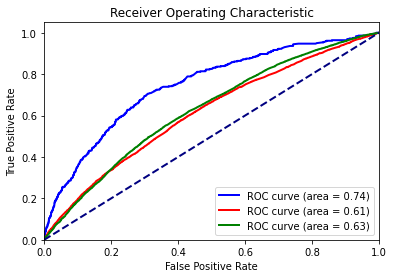

In [355]:
ROC_CURVE(NNModel, NNyStratify, NNxtest, NNytest)

#### Neural Networks ROC Curve:

The graph shows the Receiver Operating Characteristic (ROC) curves for a Neural Network model. The curves display the relationship between the true positive rate (sensitivity) and the false positive rate (1-specificity) for different thresholds of the model. 

The graph has three ROC curves, each representing the performance of the model on a different test set. The area under each curve (AUC) is indicated by the number in the parentheses and represents the model's ability to distinguish between positive and negative classes. 

The first curve has an AUC of 0.74, indicating that the model has a moderately good performance. The second and third curves have AUCs of 0.61 and 0.62, respectively, indicating a lower performance compared to the first curve. 

Overall, the graph suggests that the logistic regression model has a moderate performance in distinguishing between the positive and negative classes, but there is room for improvement.

## 2- Logistic Regression

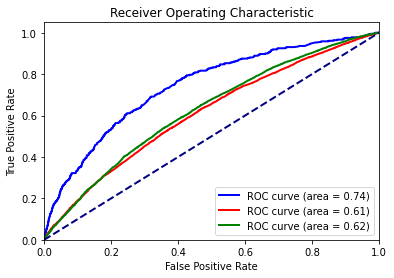

In [356]:
ROC_CURVE(LRModel, LRyStratify, LRxtest, LRytest)

#### Logistic Regression ROC Curve:

In this case, there are three ROC curves shown, each with a different AUC value. The blue curve has an AUC of 0.74, the orange curve has an AUC of 0.61, and the green curve has an AUC of 0.62. The curve with the highest AUC is considered to be the best-performing model, and in this case, it is the blue curve. 

The false positive rate is shown on the x-axis, and the true positive rate is shown on the y-axis. The point at (0,0) represents a classifier that predicts negative for all instances, while the point at (1,1) represents a classifier that predicts positive for all instances. The ROC curve starts at (0,0) and moves towards (1,1) as the threshold for classification becomes more lenient. 

Overall, the graph shows that the logistic regression model has some ability to distinguish between positive and negative classes, but there is room for improvement as the highest AUC value is 0.74.

## 3- KNN

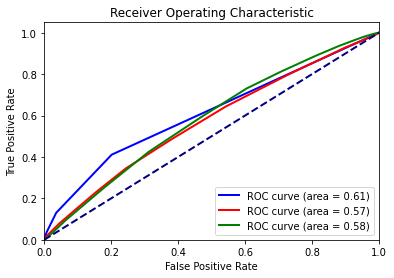

In [357]:
ROC_CURVE(KNNModel, KNNyStratify, KNNxtest, KNNytest)

#### KNN ROC Curve:

The given image shows the Receiver Operating Characteristic (ROC) curves for a KNN model trained on a dataset, with three different area values for each curve (0.61, 0.57, and 0.58). 
Based on the plot, we can also see that as the False Positive Rate increases, the True Positive Rate also increases, indicating that the model is able to correctly classify more positive instances at higher thresholds. Overall, the ROC curve provides a useful visualization of a classifier's performance and can be used to compare the performance of different models.

## 4- Naive Bayes

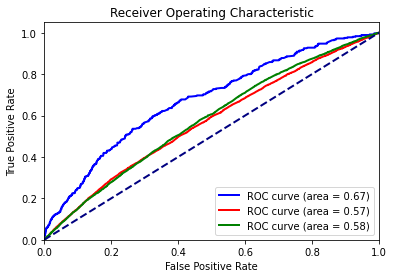

In [358]:
ROC_CURVE(NBModel, NByStratify, NBxtest, NBytest)

#### Neural Naive Bayes ROC Curve:

In this case, the first Naive Bayes model had the highest AUC of 0.67, indicating the best performance, whereas the other three models had lower AUCs of 0.57, 0.58, and 0.6. The false positive rate and true positive rate are also shown on the graph, with the optimal point being at the top-left corner of the graph, indicating a model with high true positive rate and low false positive rate.

# --------------------------------------------------------------------------------------------------------------

# Learning Curve 

# ---------------------------------------------------------------------------------------------------------------

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples.It is used to show two things; How much the estimator benefits from more data  and If the estimator is more sensitive to error due to variance vs. error due to bias.

we will create a generalized function to plot the Learning Curve and input to it the 4 models

In [2]:
def LEARNING_CURVE(model, X, Y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure(figsize=(14, 14))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training set size')
    plt.ylabel('Error')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show

#### Code Explanation

We defined a function named LEARNING_CURVE that takes a trained model, features(X), and target variable(Y) as input. The function does the following:
- Uses the learning_curve() function from scikit-learn library to generate learning curves for the model.
- The learning_curve() function generates train_sizes, train_scores, and test_scores for different training set sizes and cross-validation scores.
- The function calculates the mean and standard deviation of the train and test scores across different training set sizes.
- Plots the learning curves using matplotlib library. The x-axis represents the training set size, and the y-axis represents the error.
- The function plots the training score and the cross-validation score for each training set size, along with the mean and standard deviation of each score.
- Finally, shows the plot.

We will generate learning curves for Neural Networks and Logistic Regression only because it is irrelevant to generate for KNN and Naive Bayes since these algorithms don't include a training dataset. 

## 1- Neural Networks

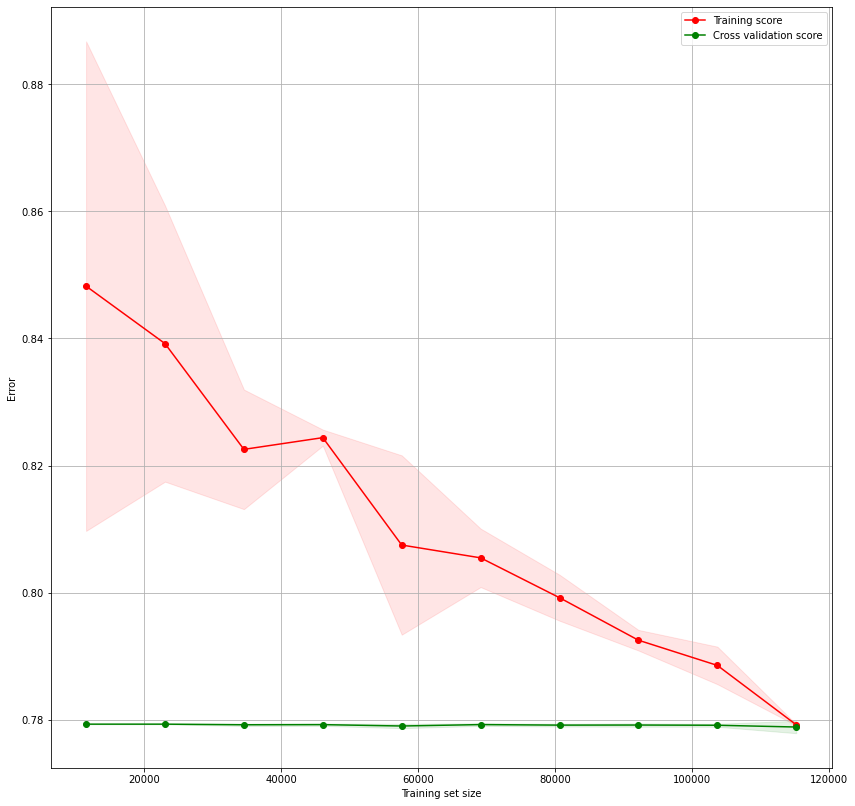

In [84]:
LEARNING_CURVE(NNModel, X, NNyStratify)

## 2- Logistic Regression

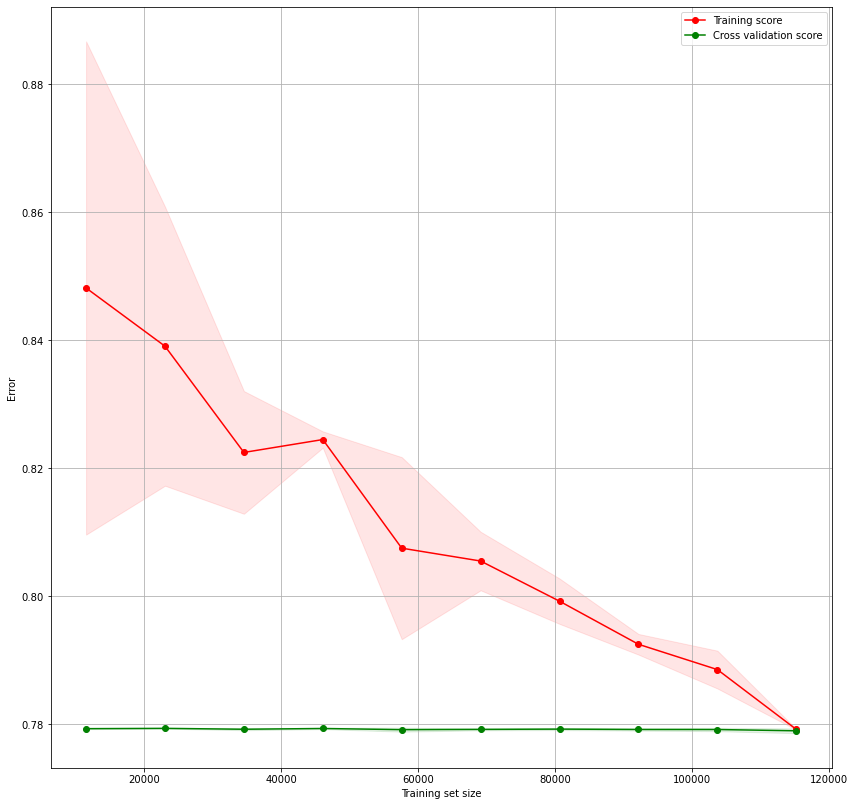

In [85]:
LEARNING_CURVE(LRModel, X, LRyStratify)

## Learning Curve Results Interpretation

From the 2 curves, it is shown that the cross validation error which is approx. 0.78 is constant/plateau. As the training dataset size increases, the training set error decreases from approx 0.85 till it converges to the same error of the cross validation which is the desired performance in this case because it suggests that the model is likely to perform well on new, unseen data.

# --------------------------------------------------------------------------------------------------------------

# Confusion Matrix

# ---------------------------------------------------------------------------------------------------------------

A confusion matrix is a table that is used to define the performance of a classification algorithm. It plots a table of all the predicted and actual values of a classifier. It shows the number of true positives, false positives, true negatives, and false negatives for a classification model.

we will create a generalized function to plot the Confusion Matrix and input to it the 4 models

In [120]:
def CONFUSION_MATRIX(y_test, y_pred):
    confusion_mat = confusion_matrix(y_test, y_pred)
    # Visualize the confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()

#### Code Explanation

We defined a function `CONFUSION_MATRIX` that takes two arguments `y_test` and `y_pred` and generates a confusion matrix plot using the `confusion_matrix` function from scikit-learn and the `heatmap` function from seaborn.  The function also adds labels to the plot and a legend that maps the class labels to colors. The legend_labels dictionary maps class labels 0, 1, and 2 to the strings 'Fatal', 'Serious', and 'Slight', respectively. The `plt.show()` function is used to display the plot

## 1- Neural Networks

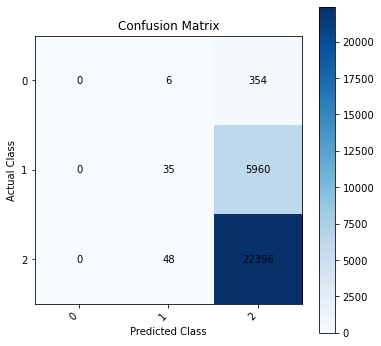

In [163]:
CONFUSION_MATRIX(NNytest, NNypred)

## 2- Logistic Regression

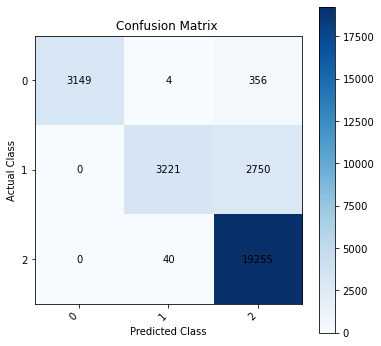

In [164]:
CONFUSION_MATRIX(LRytest, LRypred)

## 3- KNN

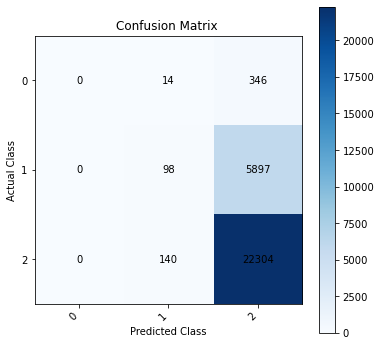

In [158]:
CONFUSION_MATRIX(KNNytest, KNNypred)

## 4- Naive Bayes

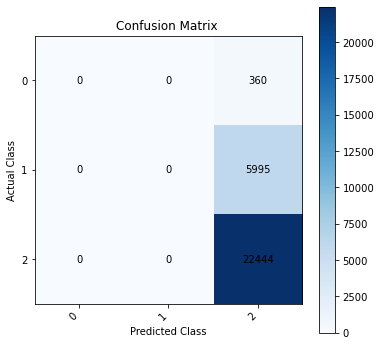

In [161]:
CONFUSION_MATRIX(NBytest, NBypred)

## Confusion Matrix Results Interpretation

Most of the data set is labeled slight so models predict Slight class better than all other classes as it is the most frequently seen by the model during training phase. Logistic regression is the only algorithm that has the capability to predict the 3 classes, while for the rest, accident severity 'Fatal' was not predicted at all, and in the case of Naive Bayes, it has only the capability to predict one class which is Slight.

# ---------------------------------------------------------------------------------------------------------------

# Overall Models' Performance Evaluation

According to all the previous trainig and evaluations, the results presented which include accuracy calculations, ROC curves, confusion matrices and learning curves show that the logistic regression model is the best model for our data set so far, as it provides good results for all the performance evaluation methods used.